In [132]:
from PySpice.Spice.Netlist import Circuit
import numpy as np
import matplotlib.pyplot as plt

In [133]:
circuit = Circuit('RC')

circuit.V('1', 'input', circuit.gnd, 'DC 1V')
circuit.R('1', 'input', 'output', 1e3)
circuit.C('1', 'output', circuit.gnd, 1e-4)
circuit.R('2', 'output', circuit.gnd, 1e3)

Resistor R2

In [134]:
simulator = circuit.simulator(temperature = 25, normal_temerature = 25)
simulator.initial_condition(output = 0)
analysis = simulator.transient(step_time = 0.001, end_time = 1)

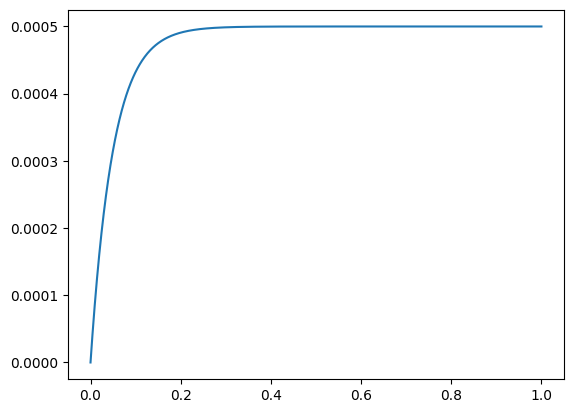

In [137]:
t = analysis.time
V_C = analysis['output']

plt.plot(t, V_C/1e3)

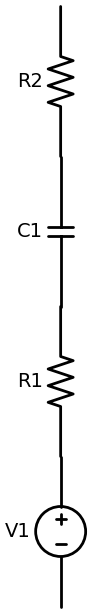

In [136]:
import schemdraw
import schemdraw.elements as elm

def draw_circuit(circuit):
    with schemdraw.Drawing() as d:
        for element in circuit.elements:
            if element.name.startswith('R'):
                d += elm.Resistor().label(element.name)
            elif element.name.startswith('C'):
                d += elm.Capacitor().label(element.name)
            elif element.name.startswith('V'):
                d += elm.SourceV().label(element.name)
        d.draw()

draw_circuit(circuit)